In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
train_path = '../input/brain-tumor-classification-mri/Training'
test_path = '../input/brain-tumor-classification-mri/Testing'

In [3]:
File=[]
for f in os.listdir(train_path):
    File += [f]

'''  total number of classes '''
print(File)

['no_tumor', 'pituitary_tumor', 'meningioma_tumor', 'glioma_tumor']


In [4]:
train_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}

count=0

for f in os.listdir(train_path):
    ''' joining path '''
    path = os.path.join(train_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling  '''
        img = img / 255.0
        ''' appending image to train_data '''
        train_data.append([img, count])     
    count=count+1

In [5]:
test_data = []

''' label encoding '''
mapping={'no_tumor':0, 'pituitary_tumor':1, 'meningioma_tumor':2, 'glioma_tumor':3}
count=0

for f in os.listdir(test_path):
    ''' joining path '''
    path=os.path.join(test_path, f)
    for im in os.listdir(path):
        ''' loading an image '''
        img = load_img(os.path.join(path, im), grayscale=False, color_mode='rgb', target_size=(150,150))
        ''' converting an image to array '''
        img = img_to_array(img)
        ''' scaling '''
        img = img/255.0
        ''' appending an image to test_data'''
        test_data.append([img, count])         
    count=count+1

In [6]:
train_images, train_labels = zip(*train_data)
test_images, test_labels = zip(*test_data)

In [7]:
''' converting labels into to_categorical '''
train_labels = to_categorical(train_labels)

''' coverting train_images into numpy array '''
train_images = np.array(train_images)

''' converting train_labesl into numpy array '''
train_labels = np.array(train_labels)

''' shaep of train_images and train_labels '''
print(train_images.shape)
print(train_labels.shape)

(2870, 150, 150, 3)
(2870, 4)


In [8]:
''' converting labels into to_categorical '''
test_labels = to_categorical(test_labels)

''' coverting test_images into numpy array '''
test_images = np.array(test_images)

''' converting train_labesl into numpy array '''
test_labels = np.array(test_labels)

''' shaep of test_images and test_labels '''
print(test_images.shape)
print(test_labels.shape)

(394, 150, 150, 3)
(394, 4)


In [9]:
''' reshaping images '''
train_images = train_images.reshape(-1,150,150,3)
test_images = test_images.reshape(-1,150,150,3)

In [10]:
''' train test split '''
X_train, X_test, y_train, y_test = train_test_split(train_images,train_labels, test_size=0.2,random_state=44)

In [11]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [12]:
''' shape of X_train, X_test, y_train, y_test '''
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2296, 150, 150, 3)
(574, 150, 150, 3)
(2296, 4)
(574, 4)


In [13]:
''' DenseNet201 Model '''
model1 = tf.keras.applications.DenseNet201(input_shape=(150,150,3),include_top=False,weights='imagenet',pooling='avg')

''' freezing layers '''
model1.trainable = False

inp = model1.input
''' Hidden Layer '''
x = tf.keras.layers.Dense(128, activation='relu')(model1.output)
''' Classification Layer '''
out = tf.keras.layers.Dense(4, activation='softmax')(x)

''' Model '''
model = tf.keras.Model(inputs=inp, outputs=out)
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.load_weights('../input/weight-and-model/mine_model_weights.h5')

2022-07-21 01:06:14.722207: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


74850304/74836368 [==============================] - 0s 0us/step


In [14]:
y_pred=model.predict(X_test)

''' retreiving max val from predicted values '''
pred = np.argmax(y_pred,axis=1)

''' retreiving max val from actual values '''
ground = np.argmax(y_test,axis=1)

''' classificaion report '''
print(classification_report(ground,pred))

2022-07-21 01:06:24.048049: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


              precision    recall  f1-score   support

           0       0.96      0.86      0.91        81
           1       0.83      0.96      0.89       157
           2       0.81      0.85      0.83       170
           3       0.96      0.82      0.88       166

    accuracy                           0.87       574
   macro avg       0.89      0.87      0.88       574
weighted avg       0.88      0.87      0.87       574



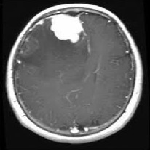

In [15]:
''' loading an image '''
load_img("../input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(112).jpg",target_size=(150,150))

In [16]:
''' predicion on new data '''

''' loading an image '''
img = load_img("../input/brain-tumor-classification-mri/Testing/meningioma_tumor/image(112).jpg",target_size=(150,150))

''' converting img to array '''
img = img_to_array(img) 

''' scaling '''
img = img / 255.0

''' expanding dimensions '''
img = np.expand_dims(img, axis=0)

In [17]:
lbl_encoding = {0:'no_tumor', 1:'pituitary_tumor', 2:'meningioma_tumor', 3:'glioma_tumor'}

def map_label(val):
    return lbl_encoding[val]

''' predicion '''
pred = model.predict(img)

''' retreiving max val from predited values'''
val = np.argmax(pred)
map_val  = map_label(val)

print("Prediction is {}.".format(map_val))

Prediction is meningioma_tumor.
